In [109]:
#Importing required Lib.

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
df=pd.read_csv("loan_prediction.csv")  #Added column name to the csv file & then import & read using Pandas lib.

In [111]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [112]:
df.shape

(614, 13)

In [113]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see there is some missing values.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Total 8 object & 5 numerical columns

In [115]:
df['Loan_Amount_Term'].nunique()

10

In [116]:
df['Dependents'].nunique()

4

In [117]:
df['LoanAmount'].nunique()

203

In [118]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [119]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [120]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

From buisness understanding I deside that I have to fill above columns null value by mode.

In [121]:
#Function for filling null values by mode.

# filling above columns null values with mode
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [122]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

From buisness understanding I deside that I have to fill LoanAmount with mean values

In [123]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [124]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#As we can see that all null values are removed fromthe dataframe.

In [125]:
# dropping unnecessary columns bec they have unique numbers only.
df.drop(['Loan_ID'],axis=1,inplace=True)

In [126]:
df.shape

(614, 12)

In [127]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [128]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)

Object Data Type Columns are:
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Number Data Type Columns are: 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


The gap between the 75th percentile and the maximum value suggests the presence of outliers in the data.

In [129]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_col:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])


In [130]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Function to convert 'Y'/'N' to 1/0
def yn_to_numeric(value):
    return 1 if value == 'Y' else 0 if value == 'N' else None

for col in categorical_col:
    if df[col].dtype == 'object':
        df[col] = df[col].map(yn_to_numeric)
        
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)
        
        
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_col:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
        

In [131]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

sns.countplot(df['Loan_Status'])

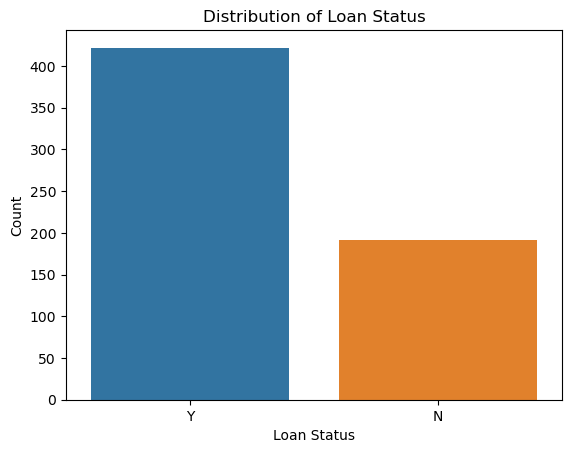

In [132]:
import matplotlib.pyplot as plt

# Create a countplot for the 'Loan_Status' column
sns.countplot(x='Loan_Status', data=df)

# Optional configurations for better visualization
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

we can see tah,Data is imbalance

In [133]:
import matplotlib.pyplot as plt

dfcorr=df.corr()

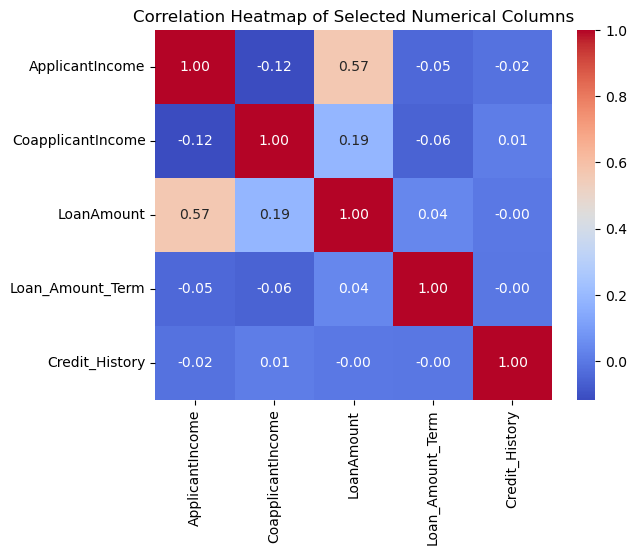

In [134]:
numerical_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
dfcorr = df[numerical_col].corr()
sns.heatmap(dfcorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numerical Columns')
plt.show()


<Axes: >

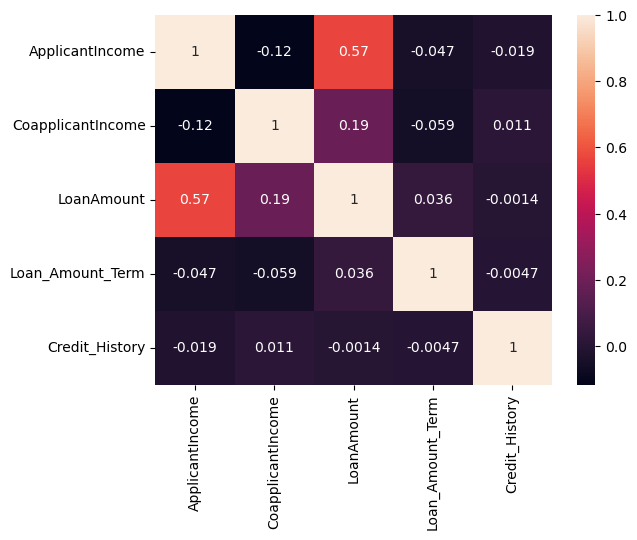

In [135]:
sns.heatmap(dfcorr,annot=True)

We can notice LoanAmount is correlated with ApplicantIncome

Object Data Type Columns are:
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Number Data Type Columns are: 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [136]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


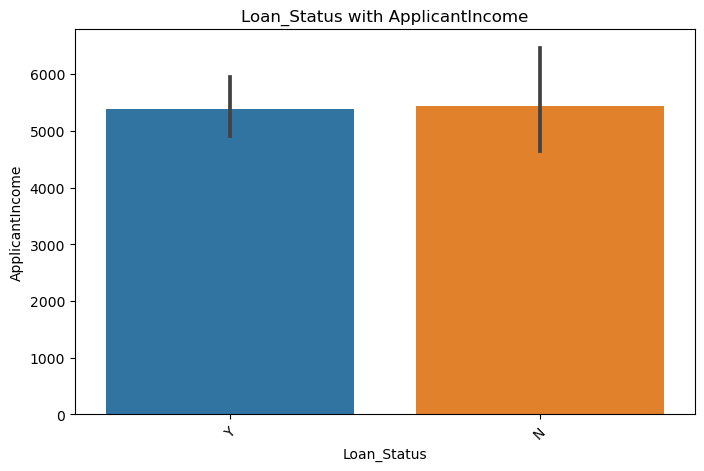

In [138]:
plt.figure(figsize=(8,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=45)
plt.show()

Chances are equal it doesn't matter with ApplicantIncome

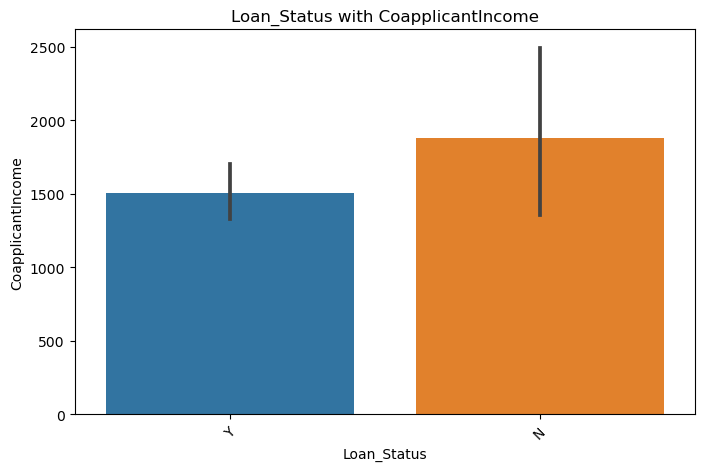

In [139]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=45)
plt.show()

Here, we can see that a high CoapplicantIncome doesn't guarantee approval; it might depend on various other factors in the data.

<Axes: xlabel='Property_Area', ylabel='count'>

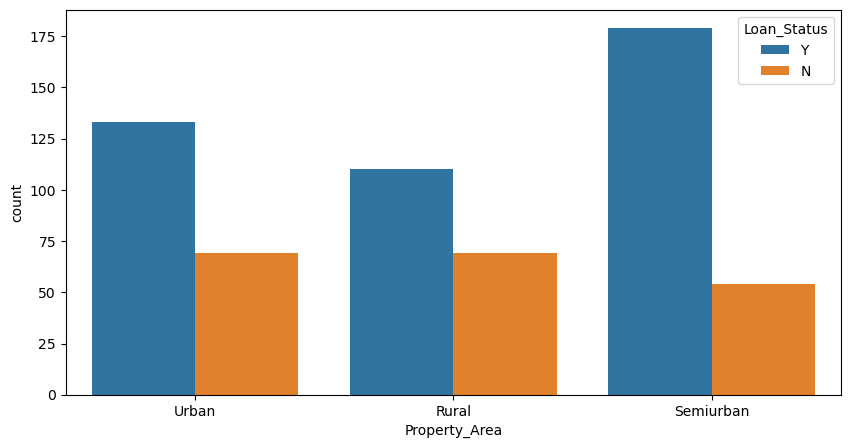

In [140]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

Urban residents have about a 50-50 chance of getting approval, with other factors playing a role as well. However, in rural areas, the odds of approval tend to be higher. Meanwhile, those in semi-urban regions have a much better likelihood of securing approval.

<Axes: xlabel='Credit_History', ylabel='count'>

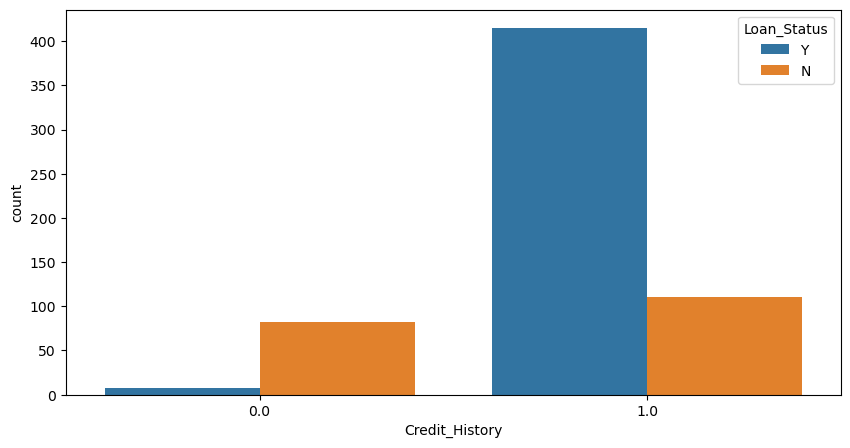

In [141]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

Individuals without a credit history often struggle to get approved, while those with a credit history are more likely to gain approval.

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

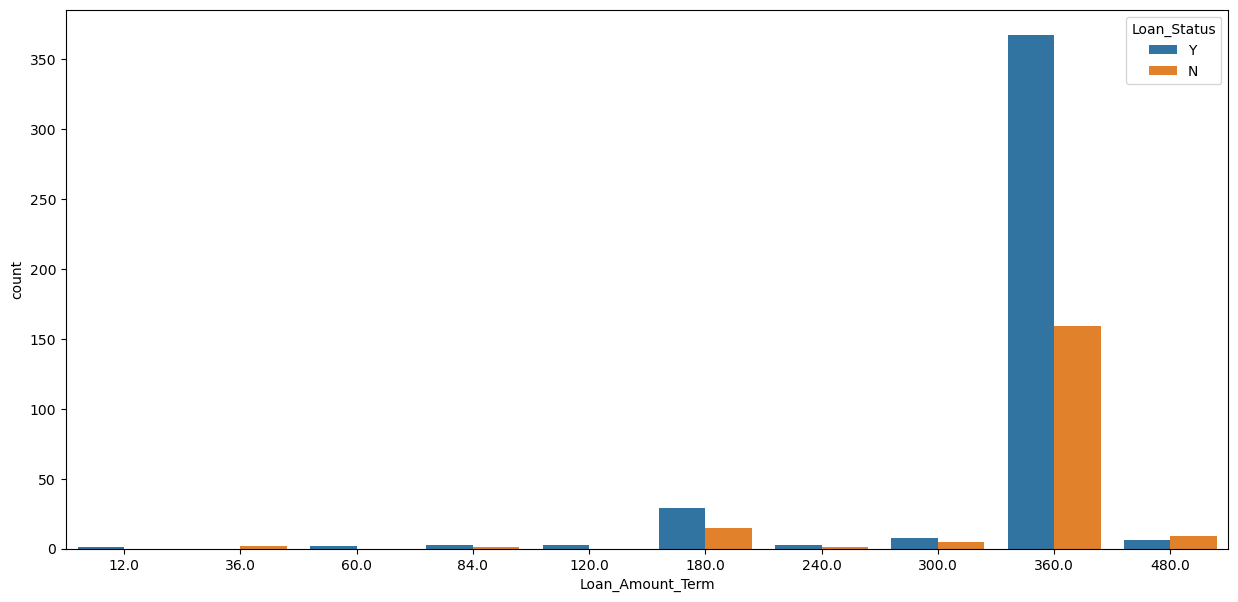

In [142]:
plt.figure(figsize=(15,7))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

The majority of loan applicants request a term of 360 months, and over half of them are approved. However, among those applying for a 480-month term, the approval rate is considerably lower.


<Axes: xlabel='Self_Employed', ylabel='count'>

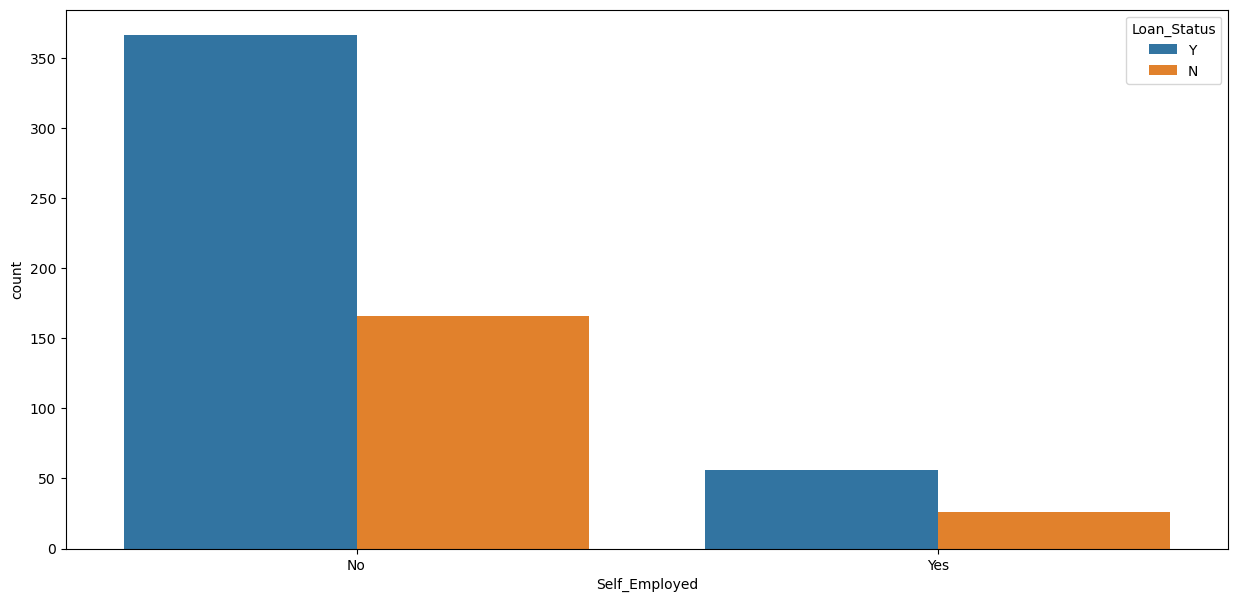

In [143]:
plt.figure(figsize=(15,7))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In self-employment, there appears to be a 50% discrepancy between those who are approved and those who are not.

<Axes: xlabel='Education', ylabel='count'>

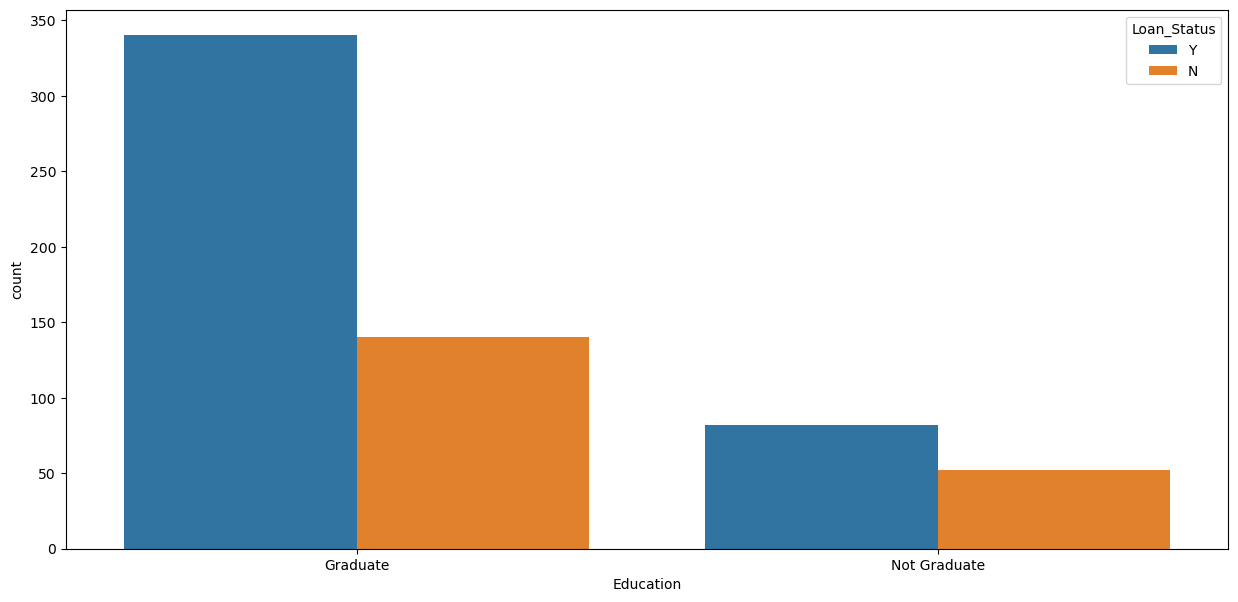

In [144]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Loan_Status',data=df)

In Graduate categ. we have around 300+ approved loan and around 150 not approved

<Axes: xlabel='Dependents', ylabel='count'>

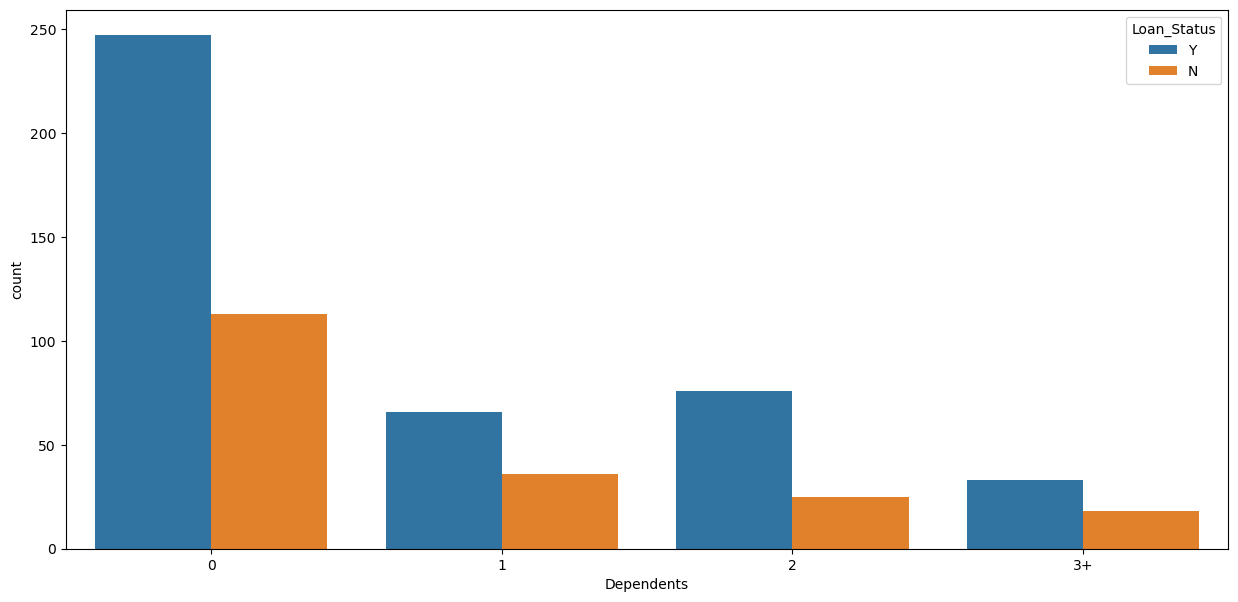

In [146]:
plt.figure(figsize=(15,7))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

Individuals without dependents have a higher likelihood of loan approval, while those with three or more dependents face lower chances of getting approved.


Using LabelEncoder for convering categorical to numerical

In [147]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


Now all columns are converted into numerical now.

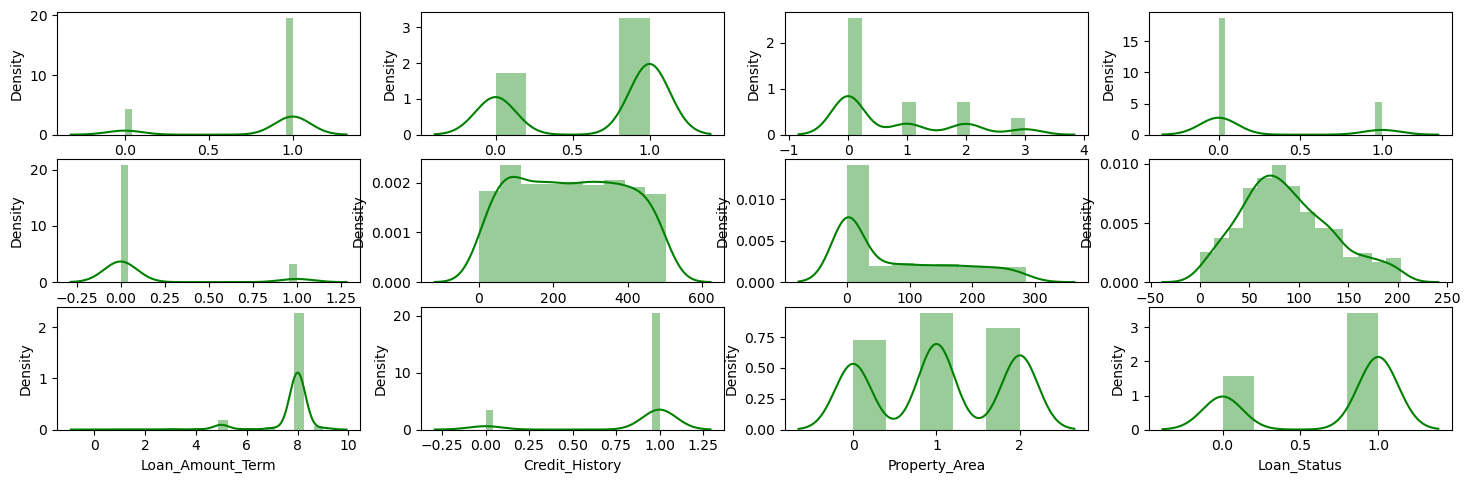

In [150]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [151]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

A skewness value exceeding +/- 0.5 requires special consideration. Columns containing categorical or target data should remain unchanged. It's evident that several columns, such as CoapplicantIncome, exhibit significant skewness.

In [152]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

The code snippet uses `power_transform` with the 'yeo-johnson' method to transform the 'CoapplicantIncome' column in the DataFrame `df`. This transformation helps to reduce skewness and make the data more normally distributed, potentially improving the performance of machine learning models.

# Now Checking Outliers

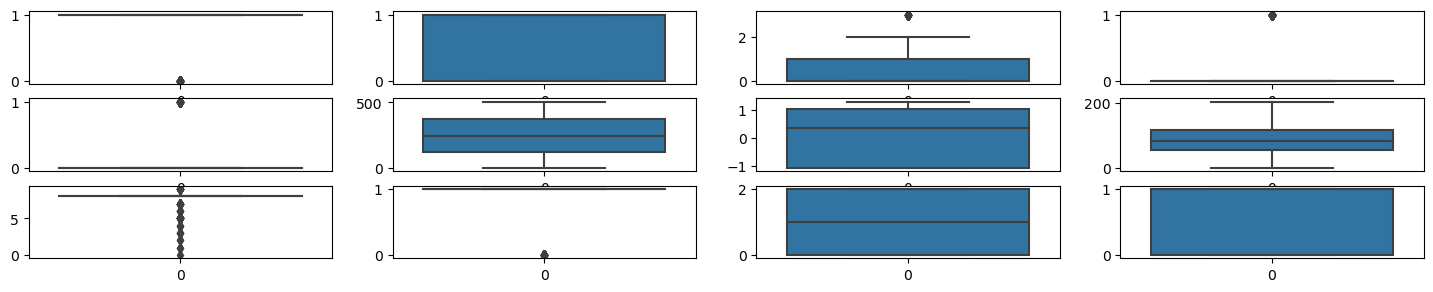

In [153]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

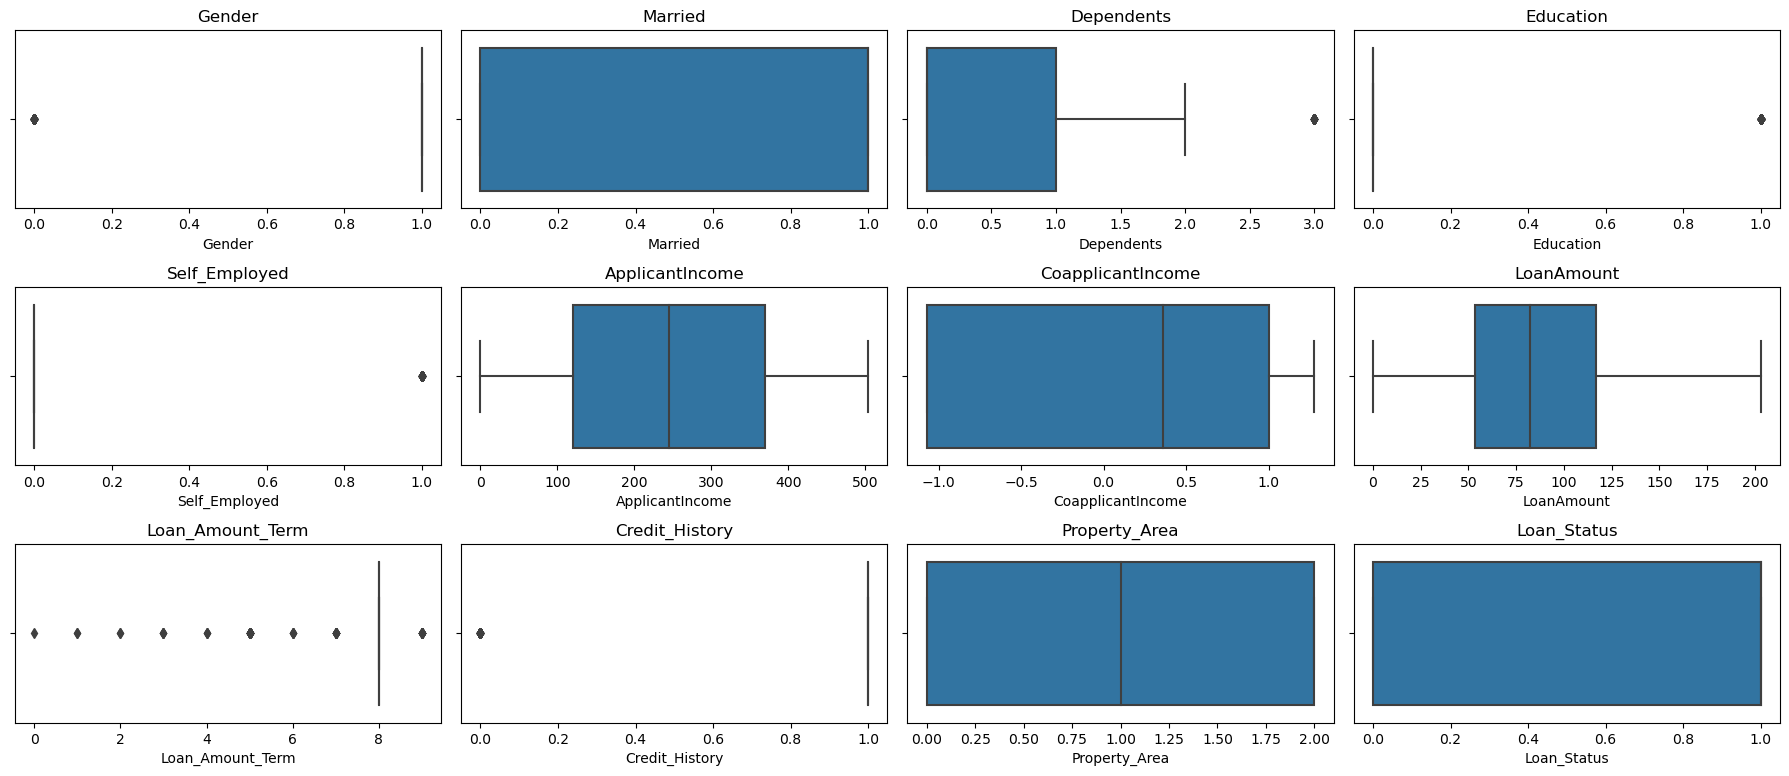

In [154]:
plt.figure(figsize=(18, 10))

num_cols = len(df.columns)
for idx, col in enumerate(df.columns):
    plt.subplot((num_cols // 4) + 1, 4, idx + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Only some of columns seems having outliers after skewness removed

outliers removal using zscore, IQR, 

In [157]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [158]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (614, 12)
After removing outliers:: (602, 12)


Zscore removing 12 rows from data

In [159]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

3.0

In [160]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(206, 12)


choosing ZSCORE because there is huge dataloss in IQR

# Dividing data into X and Y

In [161]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [162]:
 x.shape

(614, 11)

In [163]:
y.shape

(614,)

scaling X values

In [164]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [165]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [166]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.248100,0.218241,0.133550,0.490312,0.456480,0.432118,0.851972,0.855049,0.518730
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.284797,0.425818,0.224976,0.123247,0.352339,0.393741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.238591,0.000000,0.262315,0.888889,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.485119,0.608260,0.403941,0.888889,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.733631,0.883545,0.575123,0.888889,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we can see that data has scalled.

Imbalanced learn

<Axes: xlabel='Loan_Status', ylabel='count'>

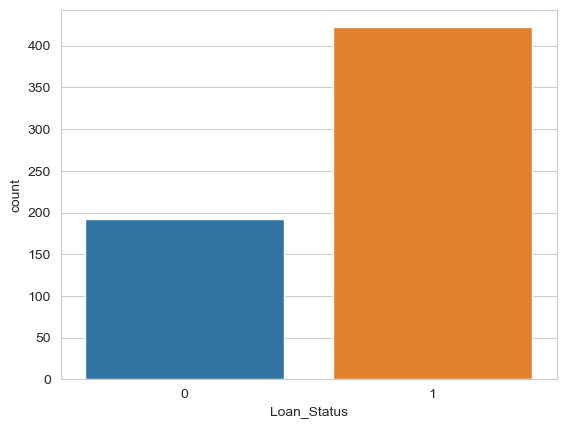

In [168]:
#Removing class imbalnceness probleme using SMOTE.
#Using OverSamling_BorderlineSMOTE

sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df)

We can see here Data is not fully balance but we'll treat the imbalace.

we have around 200 in yes and around 400 in no

In [169]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (614,)
Resample Target dataset shape (844,)


sns.set_style("whitegrid")
sns.countplot(y_rus)

Text(0, 0.5, 'count')

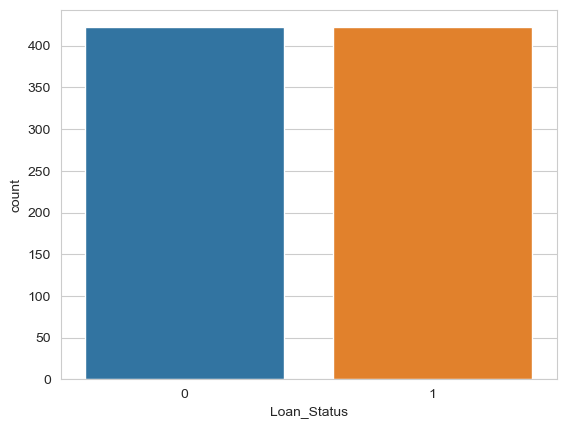

In [171]:
sns.set_style("whitegrid")
ax = sns.countplot(x=y_rus)  # Use x instead of y to match the desired output
ax.set_xlabel('Loan_Status')
ax.set_ylabel('count')

Now we have balaced data for model training

In [172]:
from sklearn.model_selection import train_test_split

In [178]:
# Using 70-30 pattern for training & testing

x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.30,random_state=42)

Using `random_state=42` is a popular convention for ensuring reproducibility. The number `42` is memorable and is often chosen due to its reference in "The Hitchhiker's Guide to the Galaxy." However, any fixed integer can be used to ensure consistent results in data splitting.

In [179]:
x_train.shape

(590, 11)

In [180]:
x_test.shape

(254, 11)

In [181]:
y_train.shape

(590,)

In [182]:
y_test.shape

(254,)

# MODEL BUILDING:

In [183]:
#Importing necessary/required libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [184]:
#LogisticRegression


logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=4,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6291469194312796


In [185]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.594488188976378
[[61 75]
 [28 90]]
              precision    recall  f1-score   support

           0       0.69      0.45      0.54       136
           1       0.55      0.76      0.64       118

    accuracy                           0.59       254
   macro avg       0.62      0.61      0.59       254
weighted avg       0.62      0.59      0.59       254

Training accuracy:: 0.6745762711864407
Test accuracy:: 0.594488188976378


In [186]:
#DECISION TREE CLASSIFIER

dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7500563539025078


In [187]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7244094488188977
[[94 42]
 [28 90]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       136
           1       0.68      0.76      0.72       118

    accuracy                           0.72       254
   macro avg       0.73      0.73      0.72       254
weighted avg       0.73      0.72      0.72       254

Training accuracy:: 1.0
Test accuracy:: 0.7244094488188977


In [188]:
#KNeighborsClassifier

knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7215553677092139


In [189]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6850393700787402
[[105  31]
 [ 49  69]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       136
           1       0.69      0.58      0.63       118

    accuracy                           0.69       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.69      0.69      0.68       254

Training accuracy:: 0.8338983050847457
Test accuracy:: 0.6850393700787402


In [190]:
#RandomForestClassifier

rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8377078050154975


In [191]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.7755905511811023
[[102  34]
 [ 23  95]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       136
           1       0.74      0.81      0.77       118

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254

Training accuracy:: 1.0
Test accuracy:: 0.7755905511811023


ENSEMBLE TECHNIQUES

1.ADA BOOST CLASSIFIER

In [192]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.7455042016806723


In [194]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.7204724409448819
[[86 50]
 [21 97]]
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       136
           1       0.66      0.82      0.73       118

    accuracy                           0.72       254
   macro avg       0.73      0.73      0.72       254
weighted avg       0.74      0.72      0.72       254

Training accuracy:: 0.8389830508474576
Test accuracy:: 0.7204724409448819


2.BAGGING CLASSIFIER

In [195]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8129271708683474


In [196]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.7559055118110236
[[102  34]
 [ 28  90]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       136
           1       0.73      0.76      0.74       118

    accuracy                           0.76       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.76      0.76      0.76       254

Training accuracy:: 0.9864406779661017
Test accuracy:: 0.7559055118110236


3.Gradient Boosting classifier

In [197]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7775910364145657


In [198]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.7598425196850394
[[ 91  45]
 [ 16 102]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       136
           1       0.69      0.86      0.77       118

    accuracy                           0.76       254
   macro avg       0.77      0.77      0.76       254
weighted avg       0.78      0.76      0.76       254

Training accuracy:: 0.9254237288135593
Test accuracy:: 0.7598425196850394


GradientBoostingClassifier as final model for HYPER PARAMETER TUNING

# HYPER PARAMETER TUNING:

model training with best parameters

In [217]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Corrected parameter grid
param_grid = {
    'n_estimators': [100, 200, 50],
    'learning_rate': [0.1, 0.5],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error'],  # Corrected parameter values
}

grbc_grid = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid,
    cv=4,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Ensure x_train and y_train are properly defined
grbc_grid.fit(x_train, y_train)

# Get predictions and evaluate accuracy
grbc_pred = grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning:", accuracy_score(y_test, grbc_pred))

# Show best parameters
grbc_grid.best_params_


Fitting 4 folds for each of 24 candidates, totalling 96 fits
Accuracy after parameter tuning: 0.7795275590551181


{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'n_estimators': 200}

model training with best parameters

In [222]:
best_param={
    'criterion' : ['friedman_mse'],
    'n_estimators':[100],
    'learning_rate':[0.1],
     'loss':['log_loss']
}

In [223]:
best_grbc_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [224]:
best_grbc_grid.fit(x_train,y_train)
best_grbc_pred=best_grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_grbc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.7598425196850394


As we notice after HYPER PARAMETER TUNING models accuracy score got increased

# Report of GradientBoostingClassifier

In [225]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_grbc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.85      0.67      0.75       136
           1       0.69      0.86      0.77       118

    accuracy                           0.76       254
   macro avg       0.77      0.77      0.76       254
weighted avg       0.78      0.76      0.76       254



<Axes: >

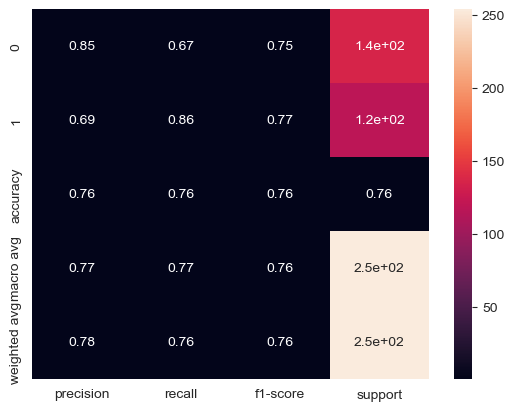

In [226]:
clsf_repo = classification_report(y_test,best_grbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [227]:
from sklearn.metrics import roc_auc_score

In [228]:
print("roc auc score::",roc_auc_score(y_test, best_grbc_pred))

roc auc score:: 0.7667622133599202


In [229]:
from sklearn.metrics import roc_curve

In [230]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_grbc_pred, pos_label=1)

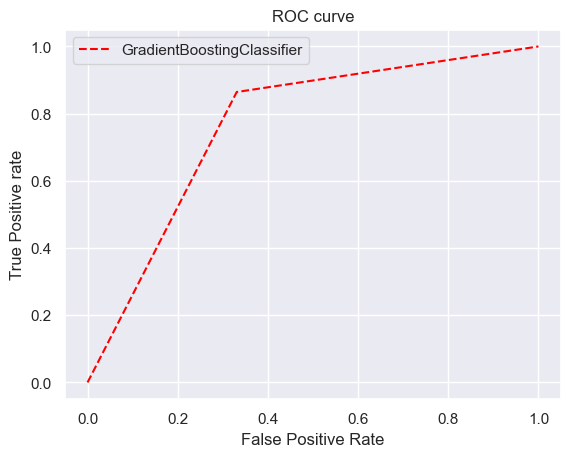

In [231]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Saving Model:

In [232]:
import joblib

In [233]:
joblib.dump(best_grbc_grid.best_estimator_,'Loan Application Status_Prediction_Solution.obj')

['Loan Application Status_Prediction_Solution.obj']